In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', 100)

#### Обработаем датасет аналогично тренировочному

In [3]:
df = pd.read_csv('course_project_test.csv')
df.sample(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
583,Rent,966150.0,3 years,0.0,9.0,5.7,366806.0,0.0,NaN,0.0,debt consolidation,Short Term,335610.0,236949.0,27213.0,722.0
446,Own Home,970045.0,10+ years,0.0,11.0,24.6,590678.0,0.0,40.0,0.0,debt consolidation,Long Term,99999999.0,100491.0,15763.0,645.0
1790,Home Mortgage,537605.0,2 years,0.0,8.0,16.6,381898.0,5.0,32.0,5.0,home improvements,Long Term,214654.0,195586.0,15322.0,6700.0
386,Own Home,1911400.0,10+ years,0.0,10.0,24.5,875358.0,0.0,NaN,0.0,debt consolidation,Short Term,442640.0,232845.0,33768.0,750.0
655,Rent,1539475.0,4 years,0.0,5.0,17.5,182644.0,0.0,44.0,0.0,other,Short Term,429528.0,62624.0,1565.0,747.0


In [4]:
def mis_values_report(df):
    '''Функция считает и выводит пропущенные значения столбцов датафрейма'''
    mis_val = df.isnull().sum()
    perc_mis_val = 100 * df.isnull().sum() / len(df)
    report = pd.concat([mis_val, perc_mis_val], axis=1)
    report_columns = report.rename(columns = {0: 'Пропущенные значения', 1: '% от всех значений'})
    report_columns = report_columns[report_columns.iloc[:,1] != 0].sort_values('% от всех значений', ascending=False).round(1)
    print('Датафрейм имеет ' + str(df.shape[1]) + ' столбцов.\n' + str(report_columns.shape[0]) + ' столбцов имеют пропущенные значения')
    return report_columns

In [5]:
mis_values_report(df)

Датафрейм имеет 16 столбцов.
5 столбцов имеют пропущенные значения


,Пропущенные значения,% от всех значений
Months since last delinquent,1358,54.3
Annual Income,513,20.5
Credit Score,513,20.5
Years in current job,86,3.4
Bankruptcies,3,0.1


In [6]:
df = df.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt', 'Purpose'],axis=1)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Years of Credit History,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Credit Score
0,Rent,NaN,4 years,0.0,12.5,0.0,0.0,Short Term,162470.0,NaN
1,Rent,231838.0,1 year,0.0,32.7,0.0,0.0,Short Term,78298.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,13.7,0.0,0.0,Short Term,200178.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,17.0,0.0,0.0,Short Term,217382.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,23.6,0.0,0.0,Long Term,777634.0,706.0


Датафрейм имеет 10 столбцов.
3 столбцов имеют пропущенные значения


,Пропущенные значения,% от всех значений
Annual Income,513,20.5
Credit Score,513,20.5
Years in current job,86,3.4


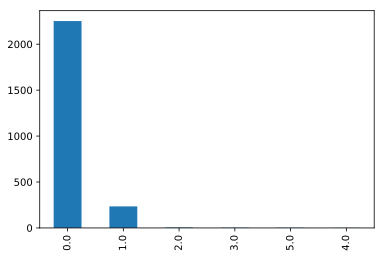

In [7]:
df['Bankruptcies'].value_counts().plot(kind='bar')
df['Bankruptcies'].fillna(float(0), inplace = True)
mis_values_report(df)

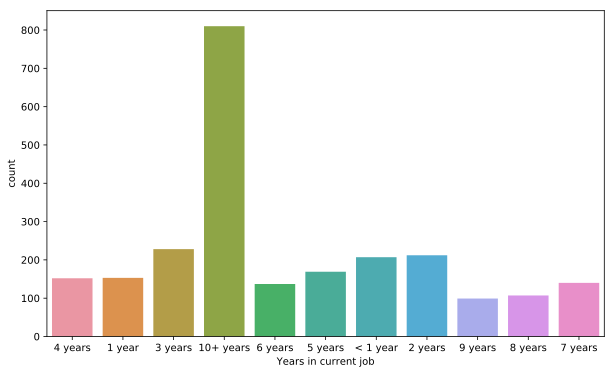

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(df['Years in current job'])

In [9]:
df['Years in current job'].fillna('10+ years', inplace = True)
mis_values_report(df)

Датафрейм имеет 10 столбцов.
2 столбцов имеют пропущенные значения


,Пропущенные значения,% от всех значений
Annual Income,513,20.5
Credit Score,513,20.5


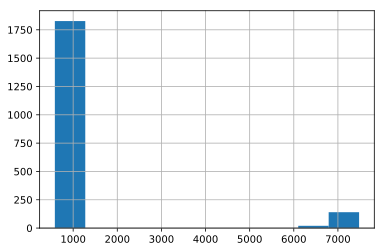

In [10]:
df['Credit Score'].hist()

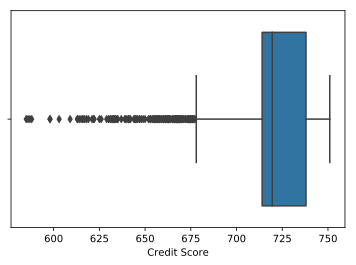

In [11]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val / 10) if val>850 else val)
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)
sns.boxplot(x=df['Credit Score'])

In [12]:
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)

In [13]:
mis_values_report(df)

Датафрейм имеет 10 столбцов.
0 столбцов имеют пропущенные значения


,Пропущенные значения,% от всех значений


### Feature Engineering

In [14]:
df['Term'].replace(('Short Term','Long Term'),(0,1), inplace=True)

In [15]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df['Credit Score'] = df['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

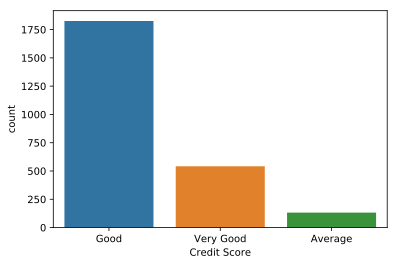

In [16]:
sns.countplot(df['Credit Score'])

In [17]:
df = df.join(pd.get_dummies(df['Credit Score'], drop_first = True))
df.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})

,Home Ownership,Annual Income,Years in current job,Tax Liens,Years of Credit History,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Credit Score,Credit Good,Credit Very Good
0,Rent,1.366922e+06,4 years,0.0,12.5,0.0,0.0,0,162470.0,Good,1,0
1,Rent,2.318380e+05,1 year,0.0,32.7,0.0,0.0,0,78298.0,Good,1,0
2,Home Mortgage,1.152540e+06,3 years,0.0,13.7,0.0,0.0,0,200178.0,Good,1,0
3,Home Mortgage,1.220313e+06,10+ years,0.0,17.0,0.0,0.0,0,217382.0,Good,1,0
4,Home Mortgage,2.340952e+06,6 years,0.0,23.6,0.0,0.0,1,777634.0,Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1.020053e+06,10+ years,0.0,29.1,1.0,1.0,0,99999999.0,Very Good,0,1
2496,Home Mortgage,1.366922e+06,2 years,0.0,17.0,0.0,0.0,0,468512.0,Good,1,0
2497,Home Mortgage,1.171806e+06,2 years,0.0,12.8,0.0,0.0,0,430496.0,Good,1,0
2498,Rent,7.235200e+05,10+ years,0.0,28.8,0.0,0.0,0,257774.0,Very Good,0,1


In [18]:
df = df.drop(['Credit Score'], axis=1)

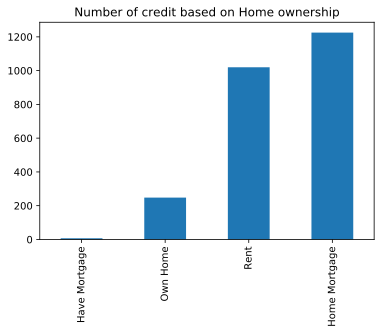

In [19]:
df['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title='Number of credit based on Home ownership')

In [20]:
df = df.join(pd.get_dummies(df['Home Ownership'],drop_first = True))
df = df.drop(['Home Ownership'], axis=1)
df.head()

,Annual Income,Years in current job,Tax Liens,Years of Credit History,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent
0,1.366922e+06,4 years,0.0,12.5,0.0,0.0,0,162470.0,1,0,0,0,1
1,2.318380e+05,1 year,0.0,32.7,0.0,0.0,0,78298.0,1,0,0,0,1
2,1.152540e+06,3 years,0.0,13.7,0.0,0.0,0,200178.0,1,0,1,0,0
3,1.220313e+06,10+ years,0.0,17.0,0.0,0.0,0,217382.0,1,0,1,0,0
4,2.340952e+06,6 years,0.0,23.6,0.0,0.0,1,777634.0,1,0,1,0,0


In [21]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)
df['Employment History'] = df['Years in current job'].apply(lambda x: 'Junior lvl' if x<4 else ('Middle lvl' if x>4 and x<8 else 'Senior lvl'))
df = df.drop(['Years in current job'], axis=1)
df.head()

,Annual Income,Tax Liens,Years of Credit History,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Employment History
0,1.366922e+06,0.0,12.5,0.0,0.0,0,162470.0,1,0,0,0,1,Senior lvl
1,2.318380e+05,0.0,32.7,0.0,0.0,0,78298.0,1,0,0,0,1,Junior lvl
2,1.152540e+06,0.0,13.7,0.0,0.0,0,200178.0,1,0,1,0,0,Junior lvl
3,1.220313e+06,0.0,17.0,0.0,0.0,0,217382.0,1,0,1,0,0,Senior lvl
4,2.340952e+06,0.0,23.6,0.0,0.0,1,777634.0,1,0,1,0,0,Middle lvl


In [22]:
df = df.join(pd.get_dummies(df['Employment History'],drop_first = True))

In [23]:
df = df.drop(['Employment History'], axis=1)
df.head()

,Annual Income,Tax Liens,Years of Credit History,Number of Credit Problems,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl
0,1.366922e+06,0.0,12.5,0.0,0.0,0,162470.0,1,0,0,0,1,0,1
1,2.318380e+05,0.0,32.7,0.0,0.0,0,78298.0,1,0,0,0,1,0,0
2,1.152540e+06,0.0,13.7,0.0,0.0,0,200178.0,1,0,1,0,0,0,0
3,1.220313e+06,0.0,17.0,0.0,0.0,0,217382.0,1,0,1,0,0,0,1
4,2.340952e+06,0.0,23.6,0.0,0.0,1,777634.0,1,0,1,0,0,1,0


In [24]:
df['Credit Problems'] = df['Number of Credit Problems'].apply(lambda x: "No Credit Problems" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Big Credit Problems"))

In [25]:
df = df.join(pd.get_dummies(df['Credit Problems'],drop_first = True))
df = df.drop(['Credit Problems','Number of Credit Problems'], axis=1)
df.head()

,Annual Income,Tax Liens,Years of Credit History,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem
0,1.366922e+06,0.0,12.5,0.0,0,162470.0,1,0,0,0,1,0,1,1,0
1,2.318380e+05,0.0,32.7,0.0,0,78298.0,1,0,0,0,1,0,0,1,0
2,1.152540e+06,0.0,13.7,0.0,0,200178.0,1,0,1,0,0,0,0,1,0
3,1.220313e+06,0.0,17.0,0.0,0,217382.0,1,0,1,0,0,0,1,1,0
4,2.340952e+06,0.0,23.6,0.0,1,777634.0,1,0,1,0,0,1,0,1,0


In [26]:
df['Credit Age'] = df['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Excellent Credit Age"))

In [27]:
df = df.join(pd.get_dummies(df['Credit Age'],drop_first = True))
df = df.drop(['Credit Age','Years of Credit History'], axis =1)
df.head()

,Annual Income,Tax Liens,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem,Good Credit Age,Short Credit Age
0,1.366922e+06,0.0,0.0,0,162470.0,1,0,0,0,1,0,1,1,0,1,0
1,2.318380e+05,0.0,0.0,0,78298.0,1,0,0,0,1,0,0,1,0,0,0
2,1.152540e+06,0.0,0.0,0,200178.0,1,0,1,0,0,0,0,1,0,1,0
3,1.220313e+06,0.0,0.0,0,217382.0,1,0,1,0,0,0,1,1,0,0,0
4,2.340952e+06,0.0,0.0,1,777634.0,1,0,1,0,0,1,0,1,0,0,0


In [28]:
df['Tax Liens'] = df['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [29]:
df = df.join(pd.get_dummies(df['Tax Liens'],drop_first = True))
df = df.drop(['Tax Liens'],axis=1)
df.head()

,Annual Income,Bankruptcies,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1.366922e+06,0.0,0,162470.0,1,0,0,0,1,0,1,1,0,1,0,1,0
1,2.318380e+05,0.0,0,78298.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,1.152540e+06,0.0,0,200178.0,1,0,1,0,0,0,0,1,0,1,0,1,0
3,1.220313e+06,0.0,0,217382.0,1,0,1,0,0,0,1,1,0,0,0,1,0
4,2.340952e+06,0.0,1,777634.0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [30]:
df['Bankruptcies'] = df['Bankruptcies'].apply(lambda x: "No Bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))
df = df.join(pd.get_dummies(df['Bankruptcies'],drop_first = True))
df = df.drop(['Bankruptcies'],axis=1)
df.head()

,Annual Income,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No Bankruptcies,Some Bankruptcies
0,1.366922e+06,0,162470.0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
1,2.318380e+05,0,78298.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1.152540e+06,0,200178.0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,1.220313e+06,0,217382.0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
4,2.340952e+06,1,777634.0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0


In [31]:
mean_income = df['Annual Income'].mean()
std_income = df['Annual Income'].std()
poorline = mean_income - std_income
richline = mean_income + std_income
print(poorline, richline)

549332.5668087595 2184510.7849778533


In [32]:
df['Annual Income'] = df['Annual Income'].apply(lambda x: "Low Income" if x <= poorline else ("Average Income" if x > poorline and x < richline else "High Income"))

In [33]:
df = df.join(pd.get_dummies(df['Annual Income'],drop_first = True))
df = df.drop(['Annual Income'], axis=1)
df.head()

,Term,Current Loan Amount,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No Bankruptcies,Some Bankruptcies,High Income,Low Income
0,0,162470.0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0
1,0,78298.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
2,0,200178.0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0
3,0,217382.0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,1,777634.0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [34]:
lmeanxoutlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = df[df['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

130222.35272860818 495560.1075528262


In [35]:
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [36]:
df = df.join(pd.get_dummies(df['Current Loan Amount'],drop_first = True))
df = df.drop(['Current Loan Amount'], axis=1)
df.head()

,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Middle lvl,Senior lvl,No Credit Problems,Some Credit promblem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No Bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1
2,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
4,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0


#### Датасет готов. Загрузим ранее созданные модели

In [38]:
from sklearn.externals import joblib
catboost_upsamled = joblib.load('catboost_upsamled.pkl')
sgd_SMOTE = joblib.load('sgd_SMOTE.pkl')
xgbc_upsampled = joblib.load('xgbc_upsampled.pkl')

In [40]:
# catboost upsampled
y_pred_catboost = catboost_upsamled.predict(df)

# SGDClassifier SMOTE

y_pred_sgd = sgd_SMOTE.predict(df)

# Xg_Boost upsampled

y_pred_xgb = xgbc_upsampled.predict(df)


In [42]:
print(y_pred_catboost.shape)
print(y_pred_sgd.shape)
print(y_pred_xgb.shape)

(2500,)
(2500,)
(2500,)


In [43]:
num_id = np.arange(7500,10000)
num_id.shape

(2500,)

In [50]:
features = ['Id','Credit Default']
predict_catboost = pd.DataFrame({'Id': num_id, 'Credit Default': y_pred_catboost},
                       columns = features, dtype=np.int32)

In [51]:
predict_catboost.head()

,Id,Credit Default
0,7500,1
1,7501,1
2,7502,0
3,7503,0
4,7504,0


In [52]:
predict_sgd = pd.DataFrame({'Id': num_id, 'Credit Default': y_pred_sgd},
                       columns = features, dtype=np.int32)

In [53]:
predict_sgd.head()

,Id,Credit Default
0,7500,1
1,7501,1
2,7502,0
3,7503,0
4,7504,0


In [54]:
predict_xgb = pd.DataFrame({'Id': num_id, 'Credit Default': y_pred_xgb},
                       columns = features, dtype=np.int32)

In [55]:
predict_xgb.head()

,Id,Credit Default
0,7500,1
1,7501,1
2,7502,0
3,7503,0
4,7504,0


In [57]:
predict_catboost.to_csv('predict_catboost', index=None)
predict_sgd.to_csv('predict_sgd', index=None)
predict_xgb.to_csv('predict_xgb', index=None)